# <center>Итоговый проект первого года обучения Skillfactory Data Science

# <center>Определение уязвимых групп населения

## <center> 5. Анализ результатов и описание кластеров

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import scipy.stats as stats
from sklearn.preprocessing import RobustScaler
from sklearn import cluster, metrics
from sklearn.mixture import GaussianMixture
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import SpectralClustering
import pickle
from sklearn.pipeline import Pipeline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
df = pd.read_csv(
    'social_russia_data/clusters.csv', index_col='region')
display(df.head())

,child_mortality_percent,general_morbidity,congenital_malformation,psychosis,teenage_pregnancy,poverty_percent,welfare_expense_share,real_incomes,real_pay,living area,...,population,grp,reg_prod_total,retail,newborn_per_population,disabled_percent,all crimes,alco,drug,cluster
region,,,,,,,,,,,,,,,,,,,,,
Алтайский край,0.395807,112764.7,5.303802,1272.1,1.458615,17.5,29.7,4.569543,103.8,2.944439,...,14.655850,12.581621,5.910482,11.942146,0.621701,1.294413,9.698184,88.1,2.912351,1
Амурская область,0.428418,83412.0,5.916472,446.7,1.686399,15.2,21.7,4.618086,105.2,2.906901,...,13.579845,13.255780,6.240458,12.409968,0.690140,1.428663,8.769196,113.3,3.234749,1
Архангельская область без Ненецкого АО,0.281883,99842.1,6.131009,685.3,2.694627,12.3,21.4,4.599152,102.9,2.884801,...,13.903911,13.150370,6.411688,12.429352,0.596224,1.244184,8.870803,64.7,2.322388,1
Астраханская область,0.461571,64679.9,6.030926,624.5,0.000000,15.6,31.4,4.585987,104.5,3.005683,...,13.821277,13.174865,6.581238,12.069840,0.734686,1.079148,8.655040,22.2,0.182322,1
Белгородская область,0.322450,74637.4,4.921440,388.2,0.000000,7.2,16.1,4.596129,104.8,2.933857,...,14.253218,13.379437,7.137797,12.376140,0.586308,1.593168,8.480322,41.3,1.435085,1


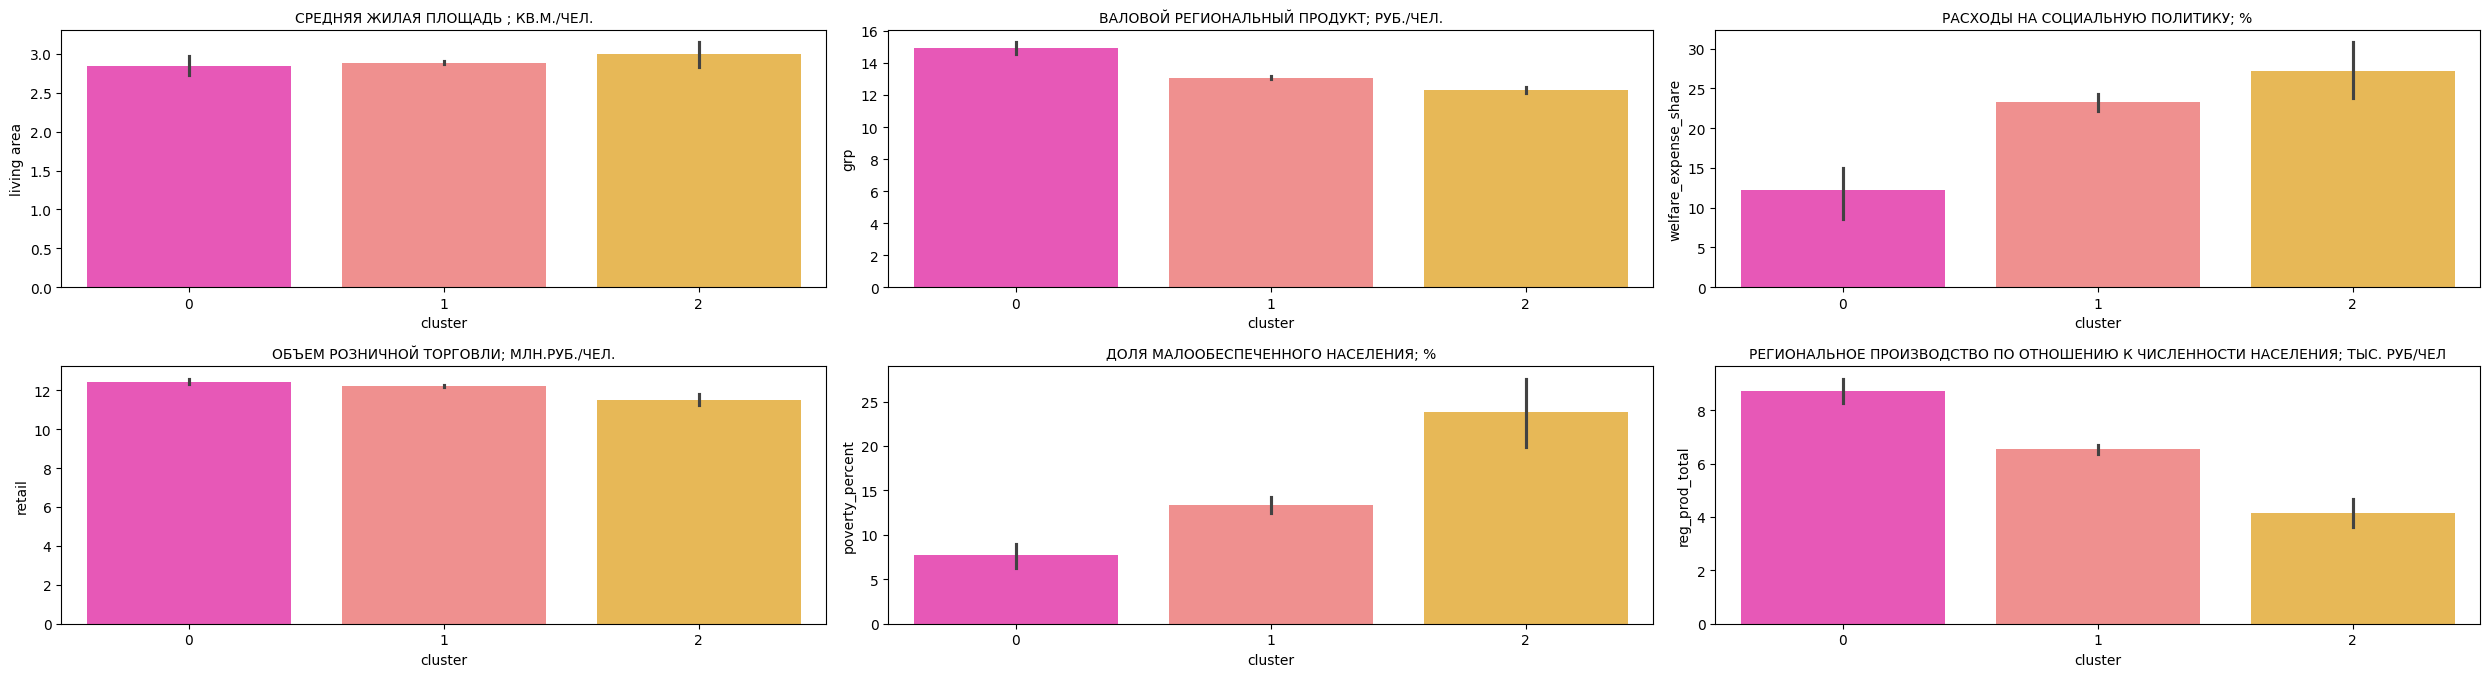

In [4]:
title=['Средняя жилая площадь ; кв.м./чел.',
       'Валовой региональный продукт; руб./чел.',
       'Расходы на социальную политику; %', 'Объем розничной торговли; млн.руб./чел.',
       'Доля малообеспеченного населения; %', 
       'Региональное производство по отношению к численности населения; тыс. руб/чел'
       ]

cols = df[
    [
        'living area',
        'grp',
        'welfare_expense_share',
        'retail',
        'poverty_percent',
        'reg_prod_total'       
    ]
].columns.tolist()
plt.figure(figsize=(25, 30))

for i, variable in enumerate(cols):
    plt.subplot(9, 3, i + 1)
    sns.barplot(x=df['cluster'], y=df[variable], palette="spring")
    plt.tight_layout()
    plt.title(title[i].upper(), fontsize = 10)
plt.show()